In [1]:
import csv
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline


### Load the dataset


In [2]:
myData= pd.read_csv('../dataSource.csv')
myData

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_city,customer_state,customer_unique_id,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,1,Credit Card,2,...,Campos Dos Goytacazes,RJ,5ee8fe956c2631afc0a1dcc1920d0e3d,1,2017,9,2,8,Wed,Sep
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,7/5/2017 2:44,55.9,17.96,1,Boleto,1,...,Jatai,GO,8b3f917f4307d3e5cf34c0b43d6e6f50,3,2017,6,2,11,Wed,Jun
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,5/23/2018 10:56,64.9,18.33,1,Credit Card,2,...,Belo Horizonte,MG,69ba88e17ea574da9c9b8c8834a583d1,1,2018,5,4,10,Fri,May
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/7/2017 18:55,58.9,16.17,1,Credit Card,3,...,Sao Jose Dos Pinhais,PR,cbe063493a222cb17024ff0285b4ecb6,3,2017,8,1,18,Tue,Aug
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,8/16/2017 22:05,58.9,13.29,1,Credit Card,4,...,Conselheiro Lafaiete,MG,ffab5330bd7b40979ab6726b2e02292e,3,2017,8,3,21,Thu,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,4/27/2017 5:10,119.9,16.14,1,Boleto,1,...,Rio De Janeiro,RJ,e060eb8f37de232154b24bbb2413b68e,1,2017,4,2,10,Wed,Apr
116577,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,8/17/2017 2:55,209.0,16.21,1,Boleto,1,...,Limeira,SP,3041f5d65c4fa516eed1325d7a8657af,1,2017,8,4,10,Fri,Aug
116578,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,8/2/2018 4:05,6729.0,193.21,1,Boleto,1,...,Vitoria,ES,57b628f46c00f9a7358e5e875d5b4dd0,0,2018,7,2,18,Wed,Jul
116579,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,4/18/2018 20:10,27.9,14.44,1,Credit Card,1,...,Cacapava,SP,ea4d52b176423e61a84052b0f4717be9,3,2018,4,3,19,Thu,Apr


In [3]:
# display attributes of data
myData.shape
myData.columns
myData.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
product_category_name             object
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_estimated_delivery_date     object
customer_zip_code_prefix           int64
customer_city   

In [4]:
# count NaN value  of columns
myData.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
product_category_name            0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
customer_unique_id               0
review_response_time             0
order_purchase_year 

### Convert date columns to datatime type

In [5]:
date_columns = ['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_estimated_delivery_date']
for col in date_columns:
    myData[col] = pd.to_datetime(myData[col],  format="mixed" )
for col in date_columns:
    
    print(col, ":", myData[pd.isna(myData[col])][col])

shipping_limit_date : Series([], Name: shipping_limit_date, dtype: datetime64[ns])
review_creation_date : Series([], Name: review_creation_date, dtype: datetime64[ns])
review_answer_timestamp : Series([], Name: review_answer_timestamp, dtype: datetime64[ns])
order_purchase_timestamp : Series([], Name: order_purchase_timestamp, dtype: datetime64[ns])
order_estimated_delivery_date : Series([], Name: order_estimated_delivery_date, dtype: datetime64[ns])


In [6]:
myData[['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_purchase_timestamp', 'order_estimated_delivery_date']]

,shipping_limit_date,review_creation_date,review_answer_timestamp,order_purchase_timestamp,order_estimated_delivery_date
0,2017-09-19 09:45:00,2017-09-21,2017-09-22 10:57:00,2017-09-13 08:59:00,2017-09-29
1,2017-07-05 02:44:00,2017-07-14,2017-07-17 12:50:00,2017-06-28 11:52:00,2017-07-26
2,2018-05-23 10:56:00,2018-06-05,2018-06-06 21:41:00,2018-05-18 10:25:00,2018-06-07
3,2017-08-07 18:55:00,2017-08-10,2017-08-13 03:35:00,2017-08-01 18:38:00,2017-08-25
4,2017-08-16 22:05:00,2017-08-25,2017-08-28 00:51:00,2017-08-10 21:48:00,2017-09-01
...,...,...,...,...,...
116576,2017-04-27 05:10:00,2017-05-25,2017-05-26 11:42:00,2017-04-19 10:20:00,2017-05-22
116577,2017-08-17 02:55:00,2017-08-18,2017-08-19 13:16:00,2017-08-11 10:15:00,2017-09-04
116578,2018-08-02 04:05:00,2018-08-16,2018-08-16 14:20:00,2018-07-25 18:10:00,2018-08-10
116579,2018-04-18 20:10:00,2018-04-21,2018-04-24 14:13:00,2018-04-12 19:47:00,2018-04-30


### Orders count across days of week and hourly comparison

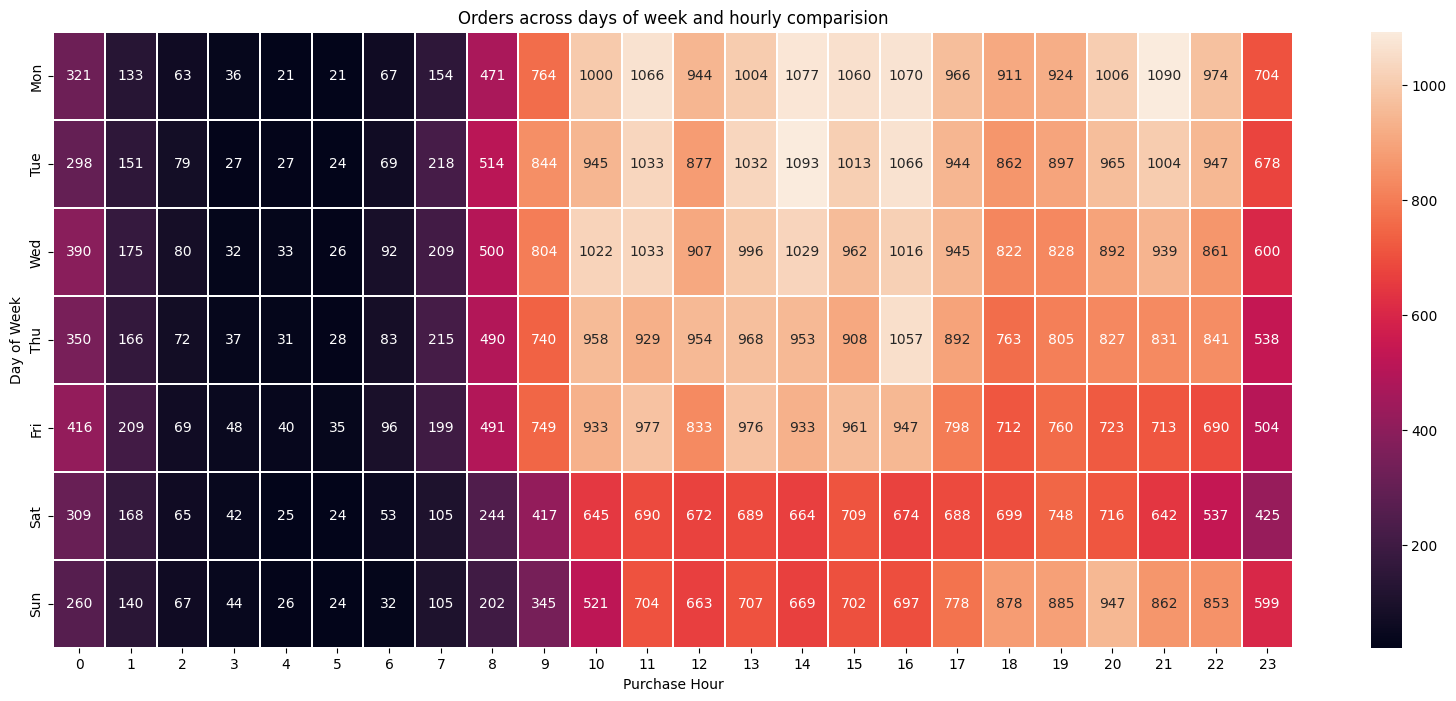

In [20]:
purchase_count = myData.groupby(['order_purchase_day', 'order_purchase_hour']).nunique()['order_id'].unstack()
plt.figure(figsize=(20,8))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), annot=True, fmt="d", linewidths=0.3)
plt.xlabel('Purchase Hour')
plt.ylabel('Day of Week')
plt.title("Orders across days of week and hourly comparision")
plt.show()

In [8]:
sale_per_month = myData.groupby(['order_purchase_day', 'order_purchase_month']).nunique()['order_id'].unstack()
print(sale_per_month)

order_purchase_month    1     2     3     4     5     6     7     8    9    
order_purchase_day                                                          
Fri                    989  1077  1455  1116  1277  1434  1224  1457  667  \
Mon                   1310  1280  1475  1653  1755  1497  1884  1607  638   
Sat                    825   948  1195   953   960  1059  1058  1098  525   
Sun                    840  1010  1096  1314  1132  1132  1348  1156  488   
Thu                   1124  1248  1658  1379  1507  1467  1351  1760  550   
Tue                   1375  1332  1389  1318  1887  1396  1772  1721  682   
Wed                   1354  1372  1388  1459  1875  1316  1507  1846  636   

order_purchase_month   10    11   12  
order_purchase_day                    
Fri                   567  1640  909  
Mon                   868  1000  880  
Sat                   447   898  684  
Sun                   680   845  669  
Thu                   634  1059  699  
Tue                   945   933  

### Total Sales month vs DayofWeek

In [9]:
# creating a purchase day feature
df = myData.copy()
# creating an aggregation
sales_per_purchase_month = myData.groupby(['order_purchase_month', 'order_purchase_mon', 'order_purchase_day'], as_index=False).payment_value.sum()
sales_per_purchase_month = sales_per_purchase_month.sort_values(by=['order_purchase_month'], ascending=True)
print(sales_per_purchase_month)


    order_purchase_month order_purchase_mon order_purchase_day  payment_value
0                      1                Jan                Fri      206844.41
1                      1                Jan                Mon      265600.11
2                      1                Jan                Sat      165882.44
3                      1                Jan                Sun      162629.79
4                      1                Jan                Thu      229321.25
..                   ...                ...                ...            ...
78                    12                Dec                Mon      159861.03
79                    12                Dec                Sat      123437.95
80                    12                Dec                Sun      116374.86
81                    12                Dec                Thu      116344.38
83                    12                Dec                Wed      175808.81

[84 rows x 4 columns]


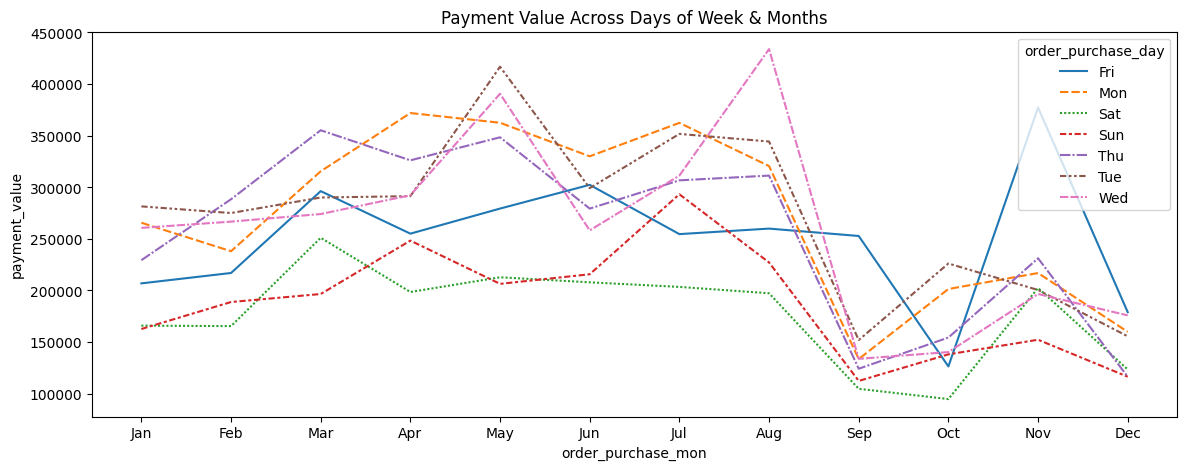

In [22]:
import plotly.express as px

df = sales_per_purchase_month
plt.figure(figsize=(14,5))
sns.lineplot(data=df, x="order_purchase_mon", y = "payment_value", hue="order_purchase_day", style ="order_purchase_day")
plt.title("Payment Value Across Days of Week & Months")
plt.show()

### Trends for Product Review Scores

In [11]:
myData['review_dayofweek'] = myData.review_answer_timestamp.apply(lambda x: x.dayofweek)
# thứ trong tuần 
print(myData['review_dayofweek'])

0         4
1         0
2         2
3         6
4         0
         ..
116576    4
116577    5
116578    3
116579    1
116580    1
Name: review_dayofweek, Length: 116581, dtype: int64


In [12]:
myData["review_day"] = myData['review_dayofweek'].map({0: "Mon",1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
print(myData["review_day"])

0         Fri
1         Mon
2         Wed
3         Sun
4         Mon
         ... 
116576    Fri
116577    Sat
116578    Thu
116579    Tue
116580    Tue
Name: review_day, Length: 116581, dtype: object


In [13]:
myData["review_month"] = myData.review_answer_timestamp.apply(lambda x: x.month)
print(myData["review_month"])


0         9
1         7
2         6
3         8
4         8
         ..
116576    5
116577    8
116578    8
116579    4
116580    4
Name: review_month, Length: 116581, dtype: int64


In [14]:

# myData['review_month'] = myData.review_answer_timestamp.apply(lambda x: x.month).map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df1 = myData.groupby(by=["review_month", "review_day"]).review_score.mean()


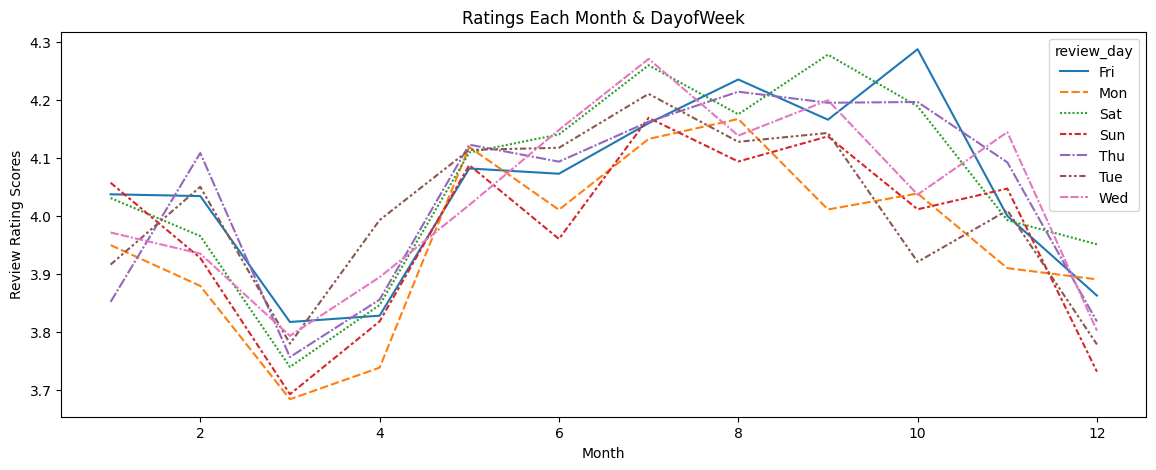

In [15]:
plt.figure(figsize=(14,5))
sns.lineplot(data= df1, x="review_month", y=df1.values, hue = "review_day",style="review_day")
plt.title("Ratings Each Month & DayofWeek")
plt.xlabel("Month")
plt.ylabel("Review Rating Scores")
plt.show()

### Rating of  product  category

In [23]:

avg_score_per_cate = myData.groupby('product_category_name').agg({'review_score':['count', 'mean']})
avg_score_per_cate.columns = ['Count', 'Average']
avg_score_per_cate = avg_score_per_cate[avg_score_per_cate['Count'] >50]
avg_score_per_cate = avg_score_per_cate.sort_values(by='Count', ascending= False)
print(avg_score_per_cate)

                                         Count   Average
product_category_name                                   
Bed Bath Table                           11990  3.867056
Health Beauty                            10030  4.119143
Sports Leisure                            9005  4.092837
Furniture Decor                           8833  3.895279
Computers Accessories                     8151  3.926144
Housewares                                7380  4.045257
Watches Gifts                             6213  4.000644
Telephony                                 4726  3.938214
Garden Tools                              4590  4.011329
Auto                                      4400  4.038636
Toys                                      4281  4.142490
Cool Stuff                                3999  4.125781
Perfumery                                 3589  4.122875
Baby                                      3204  3.995630
Electronics                               2847  4.027397
Stationery                     

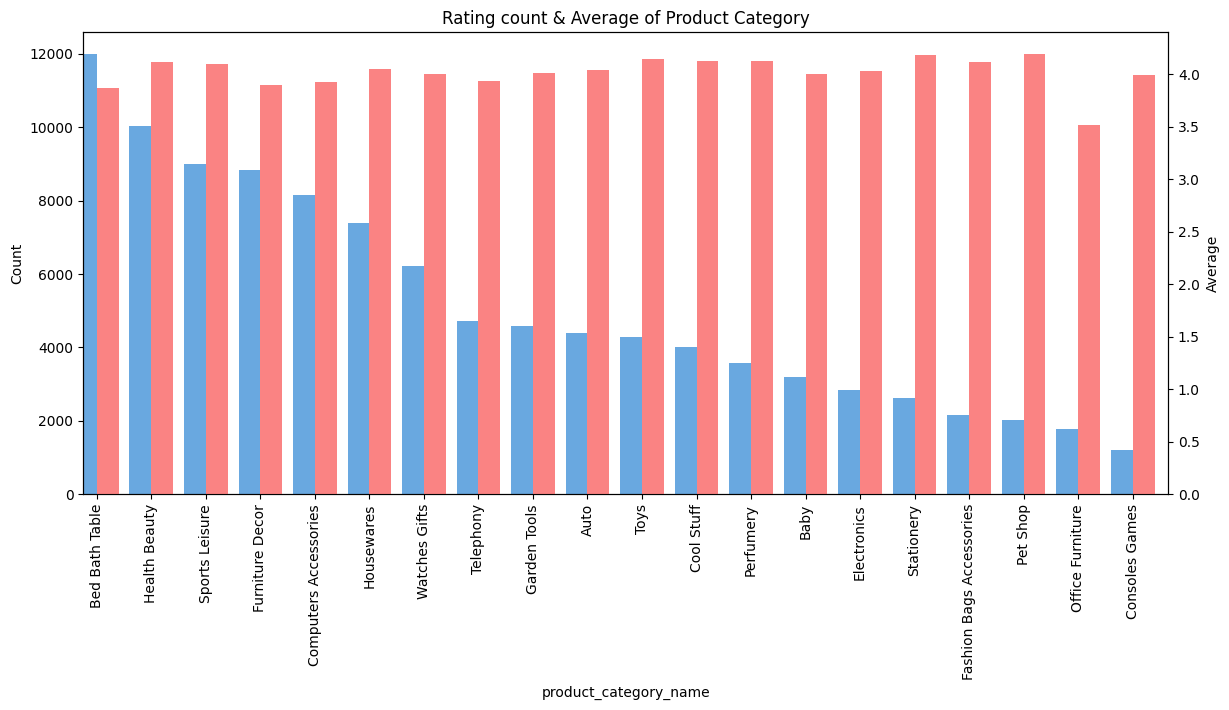

In [26]:

fig = plt.figure(figsize=(14,6)) # Create matplotlib figure
avg_score_per_cate = avg_score_per_cate[:20]
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

avg_score_per_cate.Count.plot(kind='bar', color='#69a8e0', ax=ax, width=width, position=1)
avg_score_per_cate.Average.plot(kind='bar', color='#fa8383', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax2.set_ylabel('Average')
plt.title("Rating count & Average of Product Category")

plt.show()

### Top Categories by Sales Revenue

In [28]:
sale_per_cate = myData.groupby('product_category_name', as_index=False).payment_value.sum()
sale_per_cate.columns = ["product_cate", "revenue"]
sale_per_cate = sale_per_cate.sort_values(by='revenue', ascending=False)
sale_per_cate = sale_per_cate[:20]
print(sale_per_cate)

                       product_cate     revenue
7                    Bed Bath Table  1744205.53
43                    Health Beauty  1663076.30
15            Computers Accessories  1599574.66
39                  Furniture Decor  1444383.69
70                    Watches Gifts  1430553.48
65                   Sports Leisure  1400270.11
49                       Housewares  1097900.09
5                              Auto   855095.68
42                     Garden Tools   840721.59
20                       Cool Stuff   781933.97
57                 Office Furniture   652016.50
69                             Toys   619975.71
6                              Baby   540374.92
59                        Perfumery   508538.03
68                        Telephony   487189.71
66                       Stationery   318105.09
60                         Pet Shop   311583.11
14                        Computers   279121.55
26                      Electronics   260121.61
17  Construction Tools Construction   24

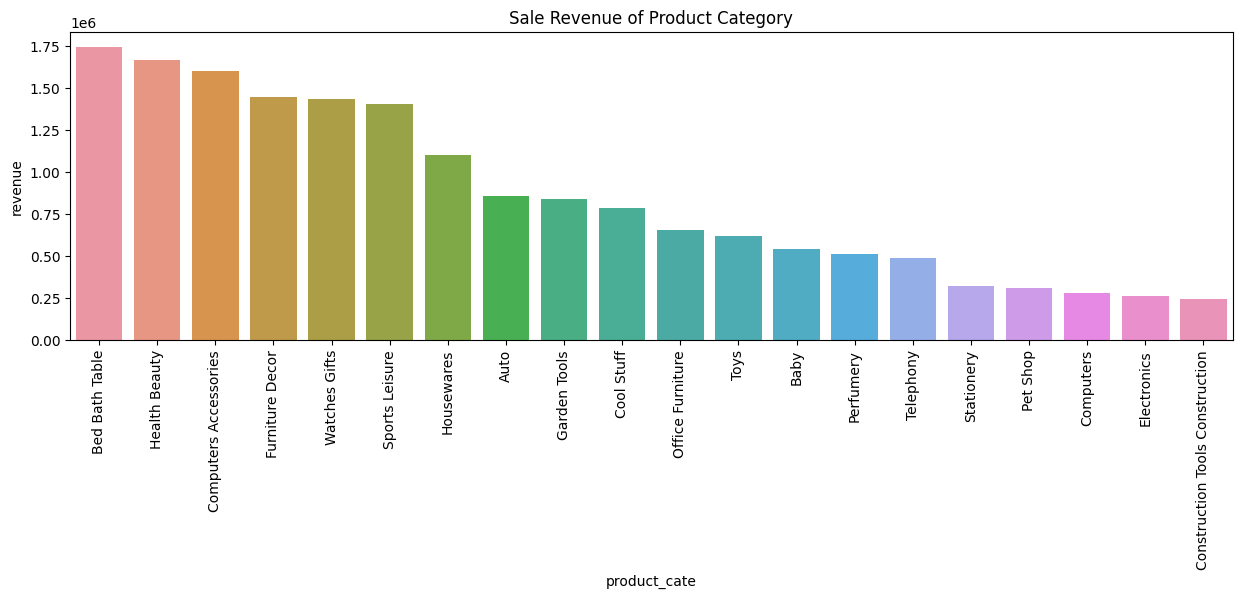

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(data=sale_per_cate, x="product_cate", y="revenue")
plt.xticks(np.arange(20), sale_per_cate["product_cate"], rotation=90)
plt.title("Sale Revenue of Product Category")
plt.show()

## Brand/Category Performance across Years

### Horizontal Metrics for dashboard (YTD for 2018)

In [31]:
total_rev_year = myData.groupby(['order_purchase_year'], as_index=False).payment_value.sum()
#total_rev_year = total_rev_year[total_rev_year['order_purchase_year']== 2018]
total_rev_year

,order_purchase_year,payment_value
0,2016,75044.76
1,2017,9080448.56
2,2018,11002557.43


In [32]:
total_orders = myData.groupby(['order_purchase_year'], as_index=False).order_id.nunique()
total_orders

,order_purchase_year,order_id
0,2016,309
1,2017,43788
2,2018,53158


In [33]:
total_category = myData.product_category_name.nunique()
total_category

71

In [34]:
total_customers = myData.customer_unique_id.nunique()
total_customers

41730

### Vertical Metrics for Dashboard

#### 1. Total Sales by category 

In [35]:
import plotly.graph_objects as go

df = myData[myData.order_purchase_year == 2018]
sales_per_category = df.groupby(['product_category_name'], as_index=False).payment_value.sum()
sales_per_category = sales_per_category.sort_values(by=['payment_value'], ascending=False)
sales_per_category.columns = ['Product Category', 'Sales Revenue']

sales_per_category = sales_per_category[:20]
labels = sales_per_category['Product Category']
values = sales_per_category['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [36]:
total_rev_month = myData.groupby(['order_purchase_year', 'order_purchase_mon', 'product_category_name'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_month.columns = ['Sales Year','Sales Month','Product Category' , 'Sales Revenue']
total_rev_month

,Sales Year,Sales Month,Product Category,Sales Revenue
0,2016,Dec,Fashion Bags Accessories,19.62
1,2016,Oct,Air Conditioning,4675.43
2,2016,Oct,Audio,183.03
3,2016,Oct,Auto,2716.70
4,2016,Oct,Baby,2344.43
...,...,...,...,...
1247,2018,May,Tablets Printing Image,58.19
1248,2018,May,Telephony,27718.21
1249,2018,May,Toys,38166.71
1250,2018,May,Watches Gifts,150688.81


#### 2. Category Sales across years

In [38]:
import plotly.express as px
import numpy as np
df = total_rev_month
fig = px.sunburst(df, path=['Sales Year', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Sales Revenue'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

#### 3. Sales by Hour

In [40]:
total_rev_hour = myData[myData['order_purchase_year'] == 2018].groupby(['order_purchase_hour', 'product_category_name'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_hour.columns = ['Sales Hour','Product Category' , 'Sales Revenue']
total_rev_hour


,Sales Hour,Product Category,Sales Revenue
0,0,Agro Industry And Commerce,610.22
1,0,Air Conditioning,1801.40
2,0,Art,1206.29
3,0,Audio,587.91
4,0,Auto,7175.56
...,...,...,...
1316,23,Stationery,6965.88
1317,23,Tablets Printing Image,129.32
1318,23,Telephony,9735.20
1319,23,Toys,6869.96


In [41]:
labels = total_rev_hour['Sales Hour']
values = total_rev_hour['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

#### 5. Category Sales by Day of Week

In [42]:
total_rev_hour = myData[myData['order_purchase_year'] == 2018].groupby(['order_purchase_day', 'product_category_name'], as_index=False).payment_value.sum()
#total_rev_month = total_rev_month.sort_values(by=['order_purchase_year'], ascending=True)
total_rev_hour.columns = ['Sales DayofWeek','Product Category' , 'Sales Revenue']
total_rev_hour


,Sales DayofWeek,Product Category,Sales Revenue
0,Fri,Agro Industry And Commerce,5839.40
1,Fri,Air Conditioning,5826.38
2,Fri,Art,2398.56
3,Fri,Arts And Craftmanship,408.95
4,Fri,Audio,4834.79
...,...,...,...
458,Wed,Stationery,33990.66
459,Wed,Tablets Printing Image,263.43
460,Wed,Telephony,61517.25
461,Wed,Toys,34728.87


In [43]:
labels = total_rev_hour['Sales DayofWeek']
values = total_rev_hour['Sales Revenue']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [44]:
df = total_rev_hour
fig = px.sunburst(df, path=['Sales DayofWeek', 'Product Category'], values='Sales Revenue',
                  color='Sales Revenue', hover_data=['Product Category'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['Sales Revenue'], weights=df['Sales Revenue']))
fig.show()

#### 6. Category Activity wrt purchases

In [50]:
cat_activity = myData[myData['order_purchase_year'] == 2018].groupby(['product_category_name']).order_id.nunique()
cat_activity = pd.DataFrame(cat_activity)
cat_activity.columns= ['Activity']
cat_activity = cat_activity.sort_values(by=['Activity'], ascending=False)
cat_activity= cat_activity.head(20)

In [51]:
fig = px.funnel_area(names=cat_activity.index,
                    values=cat_activity.Activity)
fig.show()

# Determine the user's cohort group (based on their first order)
Create a new column called CohortGroup, which is the year and month in which the user's first purchase occurred.

In [16]:

df = myData[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'product_category_name', 'customer_state']].drop_duplicates()
df

,customer_unique_id,order_id,order_purchase_timestamp,product_category_name,customer_state
0,5ee8fe956c2631afc0a1dcc1920d0e3d,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:00,Cool Stuff,RJ
1,8b3f917f4307d3e5cf34c0b43d6e6f50,130898c0987d1801452a8ed92a670612,2017-06-28 11:52:00,Cool Stuff,GO
2,69ba88e17ea574da9c9b8c8834a583d1,532ed5e14e24ae1f0d735b91524b98b9,2018-05-18 10:25:00,Cool Stuff,MG
3,cbe063493a222cb17024ff0285b4ecb6,6f8c31653edb8c83e1a739408b5ff750,2017-08-01 18:38:00,Cool Stuff,PR
4,ffab5330bd7b40979ab6726b2e02292e,7d19f4ef4d04461989632411b7e588b9,2017-08-10 21:48:00,Cool Stuff,MG
...,...,...,...,...,...
116574,a50a18d0f932c1cf1dec68cc1d281d8a,fd607d0a02cb276bc764a15f80f0423f,2018-07-26 09:13:00,Furniture Decor,BA
116576,e060eb8f37de232154b24bbb2413b68e,fdaf98feac227eb978d8f33f36e0231d,2017-04-19 10:20:00,Furniture Decor,RJ
116577,3041f5d65c4fa516eed1325d7a8657af,fe68b52db13993f58175fa589125d345,2017-08-11 10:15:00,Electronics,SP
116578,57b628f46c00f9a7358e5e875d5b4dd0,fefacc66af859508bf1a7934eab1e97f,2018-07-25 18:10:00,Computers,ES


In [17]:
df['OrderMonth'] = df['order_purchase_timestamp'].dt.to_period('M')
# df =df.groupby('customer_unique_id').nunique()
# determine the first month customer purchase
df["CohortGroup"]= df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df


,customer_unique_id,order_id,order_purchase_timestamp,product_category_name,customer_state,OrderMonth,CohortGroup
0,5ee8fe956c2631afc0a1dcc1920d0e3d,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:00,Cool Stuff,RJ,2017-09,2017-09
1,8b3f917f4307d3e5cf34c0b43d6e6f50,130898c0987d1801452a8ed92a670612,2017-06-28 11:52:00,Cool Stuff,GO,2017-06,2017-06
2,69ba88e17ea574da9c9b8c8834a583d1,532ed5e14e24ae1f0d735b91524b98b9,2018-05-18 10:25:00,Cool Stuff,MG,2018-05,2017-06
3,cbe063493a222cb17024ff0285b4ecb6,6f8c31653edb8c83e1a739408b5ff750,2017-08-01 18:38:00,Cool Stuff,PR,2017-08,2017-06
4,ffab5330bd7b40979ab6726b2e02292e,7d19f4ef4d04461989632411b7e588b9,2017-08-10 21:48:00,Cool Stuff,MG,2017-08,2017-07
...,...,...,...,...,...,...,...
116574,a50a18d0f932c1cf1dec68cc1d281d8a,fd607d0a02cb276bc764a15f80f0423f,2018-07-26 09:13:00,Furniture Decor,BA,2018-07,2018-04
116576,e060eb8f37de232154b24bbb2413b68e,fdaf98feac227eb978d8f33f36e0231d,2017-04-19 10:20:00,Furniture Decor,RJ,2017-04,2017-04
116577,3041f5d65c4fa516eed1325d7a8657af,fe68b52db13993f58175fa589125d345,2017-08-11 10:15:00,Electronics,SP,2017-08,2017-01
116578,57b628f46c00f9a7358e5e875d5b4dd0,fefacc66af859508bf1a7934eab1e97f,2018-07-25 18:10:00,Computers,ES,2018-07,2017-02


In [18]:
from operator import attrgetter
import matplotlib.colors as mcolors
df_cohort = df.groupby(['CohortGroup', 'OrderMonth']) \
              .agg(n_customers=('customer_unique_id', 'count')) \
              .reset_index(drop=False)
df_cohort['PeriodIndex'] = (df_cohort.OrderMonth - df_cohort.CohortGroup).apply(attrgetter('n'))
# print(df_cohort['PeriodIndex'])
def get_data(df_cohort):
    cohort_pivot = df_cohort.pivot_table(index = 'CohortGroup',
                                     columns = 'PeriodIndex',
                                     values = 'n_customers')
    cohort_pivot.iloc[:,0]= (cohort_pivot.iloc[:,0].divide(10, axis = 0)).astype(int)
    #cohort_pivot.iloc[:,1:] = cohort_pivot.iloc[:,0:].divide(2, axis = 0)
    cohort_pivot = cohort_pivot.iloc[4:-1,:]
    return cohort_pivot

cohort_pivot_ = get_data(df_cohort)
cohort_pivot_

PeriodIndex,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2017-02,164.0,94.0,74.0,139.0,105.0,148.0,141.0,139.0,156.0,252.0,...,228.0,236.0,196.0,192.0,203.0,NaN,NaN,NaN,NaN,NaN
2017-03,244.0,115.0,178.0,171.0,183.0,219.0,210.0,250.0,351.0,288.0,...,336.0,317.0,320.0,319.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,210.0,141.0,126.0,156.0,172.0,190.0,194.0,293.0,223.0,329.0,...,281.0,278.0,320.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,305.0,193.0,222.0,299.0,253.0,278.0,466.0,325.0,405.0,411.0,...,382.0,386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,248.0,220.0,203.0,220.0,228.0,344.0,286.0,367.0,321.0,354.0,...,324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,294.0,278.0,246.0,256.0,429.0,326.0,424.0,423.0,432.0,399.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,286.0,242.0,269.0,392.0,298.0,408.0,385.0,370.0,398.0,380.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,263.0,239.0,434.0,273.0,385.0,371.0,366.0,375.0,349.0,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,257.0,386.0,261.0,387.0,316.0,343.0,342.0,342.0,320.0,324.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
cohort_size = cohort_pivot_.iloc[:,0]
# print(cohort_size)
retention_matrix = cohort_pivot_.divide(cohort_size, axis = 0)
retention_matrix

PeriodIndex,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
CohortGroup,,,,,,,,,,,,,,,,,,,,,
2017-02,1.0,0.573171,0.451220,0.847561,0.640244,0.902439,0.859756,0.847561,0.951220,1.536585,...,1.390244,1.439024,1.195122,1.170732,1.237805,NaN,NaN,NaN,NaN,NaN
2017-03,1.0,0.471311,0.729508,0.700820,0.750000,0.897541,0.860656,1.024590,1.438525,1.180328,...,1.377049,1.299180,1.311475,1.307377,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,1.0,0.671429,0.600000,0.742857,0.819048,0.904762,0.923810,1.395238,1.061905,1.566667,...,1.338095,1.323810,1.523810,0.004762,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,1.0,0.632787,0.727869,0.980328,0.829508,0.911475,1.527869,1.065574,1.327869,1.347541,...,1.252459,1.265574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.887097,0.818548,0.887097,0.919355,1.387097,1.153226,1.479839,1.294355,1.427419,...,1.306452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.945578,0.836735,0.870748,1.459184,1.108844,1.442177,1.438776,1.469388,1.357143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.846154,0.940559,1.370629,1.041958,1.426573,1.346154,1.293706,1.391608,1.328671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.908745,1.650190,1.038023,1.463878,1.410646,1.391635,1.425856,1.326996,1.197719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,1.0,1.501946,1.015564,1.505837,1.229572,1.334630,1.330739,1.330739,1.245136,1.260700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


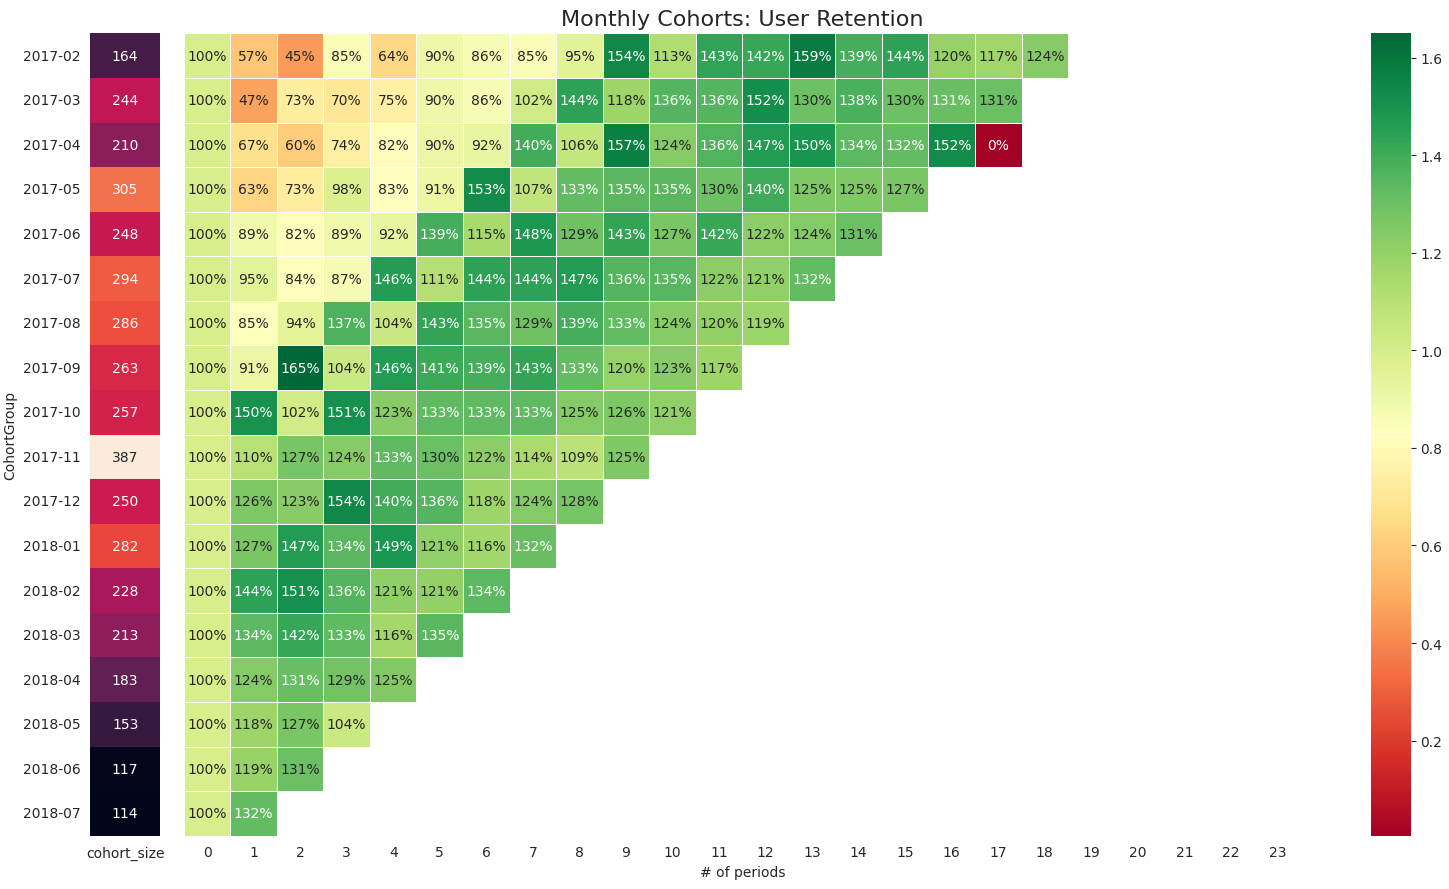

In [23]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
    
    # retention matrix
    sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.0%', cmap='RdYlGn',linewidths=0.5, ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    # white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                #cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


->>>> từ biểu đồ trên ta có thể thấy trong khoảng thời gian đầu từ 2/2017 -> 9/2017, số lượng người mua hàng khá ít và  số lượng khách hàng mới còn bị giảm đi so với những tháng trước đó. Tuy nhiên đến tháng 11/2017, số lượng khách hàng mua lần đầu tăng vọt lên và không có giấu hiệu hạ nhiệt trong thời gian tiếp theo. 